## Coding Problem
<br>
Consider the following unconstrained minimization problem
$$
\min_{x\in R^3} f(x) = \frac{1}{2}x^T Ax + x^T b
$$
where $A$ and $b$ are defined as
$$
A = \begin{bmatrix}
2 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 2
\end{bmatrix}
\qquad 
b = \begin{bmatrix}
1\\ 1\\ 1
\end{bmatrix}
$$

<br>



1. Determine whether the matrix $A$ is positive definite and find the minimum of $f$ if exists.<br>


In [1]:
# Parameters

import numpy as np
from matplotlib import pyplot as plt

A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
b = np.array([[1],[1],[1]])

eig_A = np.linalg.eigvals(A)

if (eig_A > 0).all():
    print("A is positive definite")
    
    x_star = np.linalg.solve(A, -b) 
    f_star = 0.5 * x_star.T @ A @ x_star + x_star.T @ b
    print("minimum value of f is ",f_star[0][0])
    
else:
    print("A is not positive definite")

A is positive definite
minimum value of f is  -2.5


2. Implement the gradient descent method with backtracking line search starting with $x_0=[1,1,1]^T$. Let the maximum iteration number be $50$, $\alpha=0.25$ and $\beta=0.1$. Record the function value of each iteration and plot it (x-axis: number of iterations / y-axis: function value of that iteration). </br>

In [2]:
# Define the function
def f(x):
    val = 0.5 * x.T @ A  @ x + x.T @ b
    return val[0]


# Gradient Descent
def gradient(x0,maxite,alpha,beta):
    i = 0
    t = 1
    x = x0
    fval = []
    while (i <= maxit):
        fval.append(f(x))
        grad = A @ x + b
        while (f(x - t*grad)) > (f(x) - alpha*t*grad.T @ grad):
            t = beta*t
        x = x - t*grad
        i += 1
    return fval

3. Change the learning rate to $\beta=0.3$ and $\beta=0.8$, repeate the process and plot the function value. Comment on how the learning rate will affect the gradient descent method.

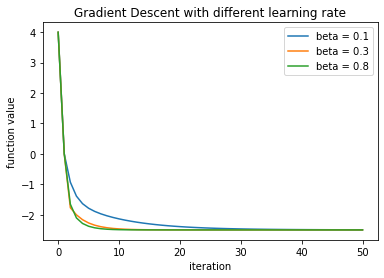

In [3]:
x0 = np.array([[1],[1],[1]])
maxit = 50

f1 = gradient(x0,maxit,alpha=0.25,beta=0.1)
f2 = gradient(x0,maxit,alpha=0.25,beta=0.3)
f3 = gradient(x0,maxit,alpha=0.25,beta=0.8)

plt.plot(f1, label = "beta = 0.1")
plt.plot(f2, label = "beta = 0.3")
plt.plot(f3, label = "beta = 0.8")
plt.xlabel('iteration')
plt.ylabel('function value') 
plt.legend()
plt.title("Gradient Descent with different learning rate")
plt.show()